In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()



--2023-01-26 18:43:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.6MB/s    in 8.1s    

2023-01-26 18:43:54 (19.9 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE=(224,224)
batch_size=32

train_dir='10_food_classes_10_percent/train'
test_dir="10_food_classes_10_percent/test"


train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_10_percent=train_datagen.flow_from_directory(train_dir,
                                                        target_size=IMAGE_SHAPE,
                                                        batch_size=batch_size,
                                                        class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=IMAGE_SHAPE,
                                           batch_size=batch_size,
                                          class_mode="categorical")


Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import datetime
import tensorflow as tf

def create_tensorboard_callback(dir_name,experiment_name):
  log_dir=dir_name+"/"+experiment_name+"/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to:{log_dir}")
  return tensorboard_callback



Crate models using tensorflow hub

In [ ]:
resnet_url="https://tfhub.dev/google/bit/m-r50x1/ilsvrc2012_classification/1"

efficientnet_url="https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/classification/2"



In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from keras import layers


In [ ]:
def create_model(model_url,num_Classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  feature_extractor_layer= hub.KerasLayer(model_url,trainable=False,
                                          name="feature_extraction_layer",
                                          input_shape=IMAGE_SHAPE+(3,))

  model=tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_Classes,activation="softmax",name="output_layer")
  ])
  return model

In [ ]:
resnet_model=create_model(resnet_url)

In [ ]:
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer="adam",
                     metrics=["accuracy"])

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1000)             25549352  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                10010     
                                                                 
Total params: 25,559,362
Trainable params: 10,010
Non-trainable params: 25,549,352
_________________________________________________________________


In [ ]:
resnet_history=resnet_model.fit(train_data_10_percent,epochs=5,
                                validation_data=test_data,
                                callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                       experiment_name="resnet50v2x1")])

Saving TensorBoard log files to:tensorflow_hub/resnet50v2x1/20230126-185023
Epoch 1/5
24/24 [==============================] - 42s 965ms/step - loss: 1.5651 - accuracy: 0.5240 - val_loss: 0.5647 - val_accuracy: 0.8160
Epoch 2/5
24/24 [==============================] - 21s 881ms/step - loss: 0.5463 - accuracy: 0.8307 - val_loss: 0.4224 - val_accuracy: 0.8660
Epoch 3/5
24/24 [==============================] - 20s 872ms/step - loss: 0.3826 - accuracy: 0.8947 - val_loss: 0.3771 - val_accuracy: 0.8796
Epoch 4/5
24/24 [==============================] - 21s 884ms/step - loss: 0.2987 - accuracy: 0.9120 - val_loss: 0.3557 - val_accuracy: 0.8868
Epoch 5/5
24/24 [==============================] - 20s 869ms/step - loss: 0.2376 - accuracy: 0.9320 - val_loss: 0.3632 - val_accuracy: 0.8828


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss= history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["val_accuracy"]))

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


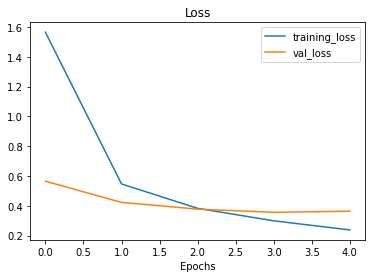

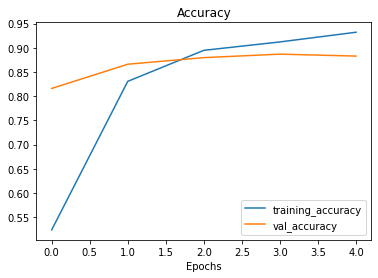

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
efficient_model=create_model(efficientnet_url)

In [ ]:
efficient_model.compile(loss="categorical_crossentropy",
                     optimizer="adam",
                     metrics=["accuracy"])

In [ ]:
efficient_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1000)             10178374  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                10010     
                                                                 
Total params: 10,188,384
Trainable params: 10,010
Non-trainable params: 10,178,374
_________________________________________________________________


In [ ]:
efficient_history=efficient_model.fit(train_data_10_percent,epochs=5,
                                validation_data=test_data,
                                callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                       experiment_name="effnetv2b2")])

Saving TensorBoard log files to:tensorflow_hub/effnetv2b2/20230126-190508
Epoch 1/5
24/24 [==============================] - 25s 753ms/step - loss: 1.8888 - accuracy: 0.3747 - val_loss: 1.0856 - val_accuracy: 0.6412
Epoch 2/5
24/24 [==============================] - 15s 634ms/step - loss: 0.9080 - accuracy: 0.7160 - val_loss: 0.8064 - val_accuracy: 0.7320
Epoch 3/5
24/24 [==============================] - 15s 636ms/step - loss: 0.6750 - accuracy: 0.7987 - val_loss: 0.7232 - val_accuracy: 0.7576
Epoch 4/5
24/24 [==============================] - 15s 643ms/step - loss: 0.5406 - accuracy: 0.8493 - val_loss: 0.6941 - val_accuracy: 0.7712
Epoch 5/5
24/24 [==============================] - 15s 631ms/step - loss: 0.4668 - accuracy: 0.8760 - val_loss: 0.6699 - val_accuracy: 0.7812


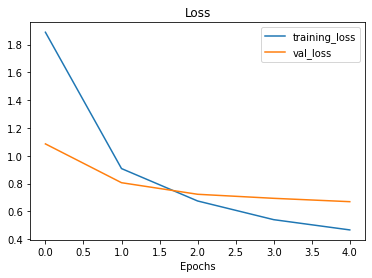

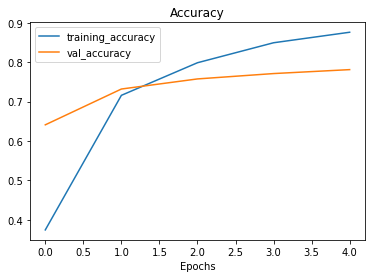

In [ ]:
plot_loss_curves(efficient_history)